In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession, DataFrame
%matplotlib inline

In [2]:
spark = (
        SparkSession.builder.appName("MAST30034 Project 2")
        .config("spark.sql.repl.eagerEval.enabled", True) 
        .config("spark.sql.parquet.cacheMetadata", "true")
        .config("spark.sql.session.timeZone", "Etc/UTC")
        .config("spark.driver.memory", "4g")
        .getOrCreate()
    )

In [3]:
merch_df = spark.read.parquet("/Users/oliver/Downloads/merchants_with_tags")
merch_stat_df = spark.read.parquet("/Users/oliver/Downloads/final_merchant_statistics").toPandas()

In [5]:
merch_df

,name,merchant_abn,revenue_level,take_rate,antique_shop_sale,appliance_rent_leasing,art_dealer_gallery,artist_supply_craft_shop,bicycle_shop_sale_service,book,...,shoe_shop,silverware_shop,software,souvenir_shop,stationery,telecom,tent_owning_shop,tool,toy_game_shop,watch
0,Odio Tristique Pharetra Associates,93712553837,a,5.93,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Donec Luctus Aliquet Inc.,93720983561,c,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Quam Quis Diam Company,93723130289,b,3.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Justo Praesent Luctus Inc.,93726438981,a,5.91,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Tellus Nunc Industries,93732268717,d,1.04,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,Et Magnis Dis Corp.,71247553576,a,6.77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4022,Quam PC,71253802438,b,3.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4023,Lectus Company,71274812967,b,3.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,Vivamus Molestie Corporation,71305424518,c,2.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
merch_df.columns

Index(['name', 'merchant_abn', 'revenue_level', 'take_rate',
       'antique_shop_sale', 'appliance_rent_leasing', 'art_dealer_gallery',
       'artist_supply_craft_shop', 'bicycle_shop_sale_service', 'book',
       'cable', 'card', 'clock', 'computer', 'computer_peripheral_equipment',
       'computer_programming', 'data_processing', 'digital_good_book',
       'equipment', 'except_appliance', 'eyeglass', 'flower', 'forest_supply',
       'furniture', 'gift', 'health_beauty_spa', 'hobby',
       'home_furnishing_equipment_shop', 'including_nursery',
       'integrated_system_design_service', 'jewelry', 'jewelry_repair_shop',
       'lawn_garden_supply_outlet', 'manufacturer',
       'motor_vehicle_supply_new_part', 'movie', 'music',
       'music_shop_musical_instrument', 'newspaper', 'novelty',
       'nursery_stock', 'office_supply_printing_writing_paper', 'optical_good',
       'optician', 'pay_television_radio_service', 'periodical', 'piano',
       'repair', 'restoration_service'

In [7]:
tags = merch_df.columns[4:]
tags

Index(['antique_shop_sale', 'appliance_rent_leasing', 'art_dealer_gallery',
       'artist_supply_craft_shop', 'bicycle_shop_sale_service', 'book',
       'cable', 'card', 'clock', 'computer', 'computer_peripheral_equipment',
       'computer_programming', 'data_processing', 'digital_good_book',
       'equipment', 'except_appliance', 'eyeglass', 'flower', 'forest_supply',
       'furniture', 'gift', 'health_beauty_spa', 'hobby',
       'home_furnishing_equipment_shop', 'including_nursery',
       'integrated_system_design_service', 'jewelry', 'jewelry_repair_shop',
       'lawn_garden_supply_outlet', 'manufacturer',
       'motor_vehicle_supply_new_part', 'movie', 'music',
       'music_shop_musical_instrument', 'newspaper', 'novelty',
       'nursery_stock', 'office_supply_printing_writing_paper', 'optical_good',
       'optician', 'pay_television_radio_service', 'periodical', 'piano',
       'repair', 'restoration_service', 'satellite', 'sheet_music',
       'shoe_shop', 'silverware

## Categorising industry

In [9]:
merchant = pd.read_csv("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/data/curated/clean_merchant.csv")

In [10]:
merchant['tags'].unique()

array(['furniture, home furnishings and equipment shops, and manufacturers, except appliances',
       'cable, satellite, and other pay television and radio services',
       'jewelry, watch, clock, and silverware shops',
       'watch, clock, and jewelry repair shops',
       'music shops - musical instruments, pianos, and sheet music',
       'gift, card, novelty, and souvenir shops',
       'computers, computer peripheral equipment, and software',
       'computer programming , data processing, and integrated systems design services',
       'equipment, tool, furniture, and appliance  rent al and leasing',
       'artist supply and craft  shops',
       'florists supplies, nursery stock, and flowers',
       'computers, computer peripheral  equipment, and software',
       'antique shops - sales, repairs, and restoration services',
       'motor vehicle supplies and new parts',
       'artist supply and craft shops', 'artist supply  and craft shops',
       'books, periodicals, and 

### Find abn(s) in each tag

In [11]:
abn_in_tags = {tag: merch_df[merch_df[tag] != 0]['merchant_abn'].unique().tolist() for tag in tags}

In [ ]:
# 'avg_daily_rev',
#  'avg_value_per_order',
#  'avg_daily_order',
#  'avg_daily_commission',
#  'avg_commission_per_order',
#  'sa2_region_count',
#  'median_customer_income',
#  'returning_customer',
#  'mean_spending',
#  'std_spending',
#  'vip_customer'

tag_summary = {'tag':[],
               'total_no_order':[],
               'avg_daily_order':[],
               'avg_take_rate':[],
               'total_avg_daily_rev':[],
               'total_avg_daily_order':[],
               'avg_value_per_order':[],
               'avg_daily_commission':[],
               'avg_commission_per_order':[],
               'avg_median_customer_income':[],
               'total_returning_customer':[],
               'mean_spending_customer':[],
               'std_spending_customer':[],
               'total_vip':[]}

for tag in abn_in_tags.keys():
    filtered_abn = df[df['merchant_abn'].isin(abn_in_tags[tag])]
    tag_summary['tag'].append(tag)
    tag_summary['total_no_order'].append(filtered_abn['no_orders'].sum())
    tag_summary['avg_daily_order'].append(filtered_abn['avg_daily_order'].mean())
    tag_summary['avg_take_rate'].append(filtered_abn['take_rate'].mean())
    tag_summary['total_avg_daily_rev'].append(filtered_abn['avg_daily_rev'].sum())
    tag_summary['total_avg_daily_order'].append(filtered_abn['avg_daily_order'].sum())
    tag_summary['avg_value_per_order'].append(filtered_abn['avg_value_per_order'].mean())
    tag_summary['avg_daily_commission'].append(filtered_abn['avg_daily_commission'].mean())
    tag_summary['avg_commission_per_order'].append(filtered_abn['avg_commission_per_order'].mean())
    tag_summary['avg_median_customer_income'].append(filtered_abn['median_customer_income'].mean())
    tag_summary['total_returning_customer'].append(filtered_abn['returning_customer'].mean())
    tag_summary['mean_spending_customer'].append(filtered_abn['mean_spending'].mean())
    tag_summary['std_spending_customer'].append(filtered_abn['std_spending'].mean())
    tag_summary['total_vip'].append(filtered_abn['vip_customer'].sum())

tag_summary = pd.DataFrame(tag_summary)

In [ ]:
tag_summary.sort_values('avg_value_per_order', ascending=False)

In [12]:
i=0
tag_code = {}
def flatten(ind):
    new_dict = {}
    for key, items in ind.items():
        for item in items:
            new_dict[item] = key
            
    return new_dict

In [36]:
labelling = flatten(ind)

In [149]:
labelling

{'art_dealer_gallery': 'luxury goods',
 'antique_shop_sale': 'luxury goods',
 'jewelry': 'luxury goods',
 'silverware_shop': 'luxury goods',
 'artist_supply_craft_shop': 'leisure goods and services',
 'book': 'leisure goods and services',
 'digital_good_book': 'leisure goods and services',
 'hobby': 'leisure goods and services',
 'music_shop_musical_instrument': 'leisure goods and services',
 'newspaper': 'leisure goods and services',
 'novelty': 'leisure goods and services',
 'periodical': 'leisure goods and services',
 'piano': 'leisure goods and services',
 'sheet_music': 'leisure goods and services',
 'toy_game_shop': 'leisure goods and services',
 'forest_supply': 'gifts souvenirs',
 'movie': 'leisure goods and services',
 'music': 'leisure goods and services',
 'tent_owning_shop': 'leisure goods and services',
 'furniture': 'home furnishings',
 'home_furnishing_equipment_shop': 'home furnishings',
 'nursery_stock': 'home furnishings',
 'including_nursery': 'home furnishings',
 'l

In [155]:
merch_df

,name,merchant_abn,revenue_level,take_rate,antique_shop_sale,appliance_rent_leasing,art_dealer_gallery,artist_supply_craft_shop,bicycle_shop_sale_service,book,...,shoe_shop,silverware_shop,software,souvenir_shop,stationery,telecom,tent_owning_shop,tool,toy_game_shop,watch
0,Odio Tristique Pharetra Associates,93712553837,a,5.93,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Donec Luctus Aliquet Inc.,93720983561,c,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Quam Quis Diam Company,93723130289,b,3.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Justo Praesent Luctus Inc.,93726438981,a,5.91,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Tellus Nunc Industries,93732268717,d,1.04,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,Et Magnis Dis Corp.,71247553576,a,6.77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4022,Quam PC,71253802438,b,3.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4023,Lectus Company,71274812967,b,3.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,Vivamus Molestie Corporation,71305424518,c,2.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
DEFAULT_SEGMENT_JSON_PATH = './scripts/utilities' # where the raw data is

# TODO: function to generate the model
# TODO: add a flag to the ETL on whether to generate the model or simply not calculate fraud.

def read_segment_json(json_path: str = DEFAULT_SEGMENT_JSON_PATH):
    
    with open(f"{json_path}/segment_tags.json", 'r') as json_file:
        segment_tags = json.load(json_file)
        
    return segment_tags

def transform_segment(merchants_with_tags: DataFrame) -> DataFrame:
    
    segment_tags = read_segment_json()
    labelling = flatten(segment_tags)
    
    tag_df = merchants_with_tags.iloc[:, ~(merchants_with_tags.columns.isin(['name','merchant_abn','take_rate','revenue_level']))]
    tag_df = tag_df.apply(lambda x: get_tag(x, tag_df), axis=1)
    
    merchant_segment = {}
    i = 0
    for idx, item in tag_df.items():
        abn = merchants_with_tags.iloc[i]['merchant_abn']
        merchant_segment[abn] = []
        for tag in item:
            if labelling[tag] not in merchant_segment[abn]:
                merchant_segment[abn].append(labelling[tag])

        i += 1
        
    df = (pd.DataFrame.from_dict(merchant_segment,orient='index')
                      .apply(lambda x: ",".join(x.dropna()), axis=1)
                      .reset_index()
                      .rename({'index':'merchant_abn'},axis=1))
    
    return pd.concat([df['merchant_abn'], 
                      df[0].str.get_dummies(sep=',')], 
                     axis=1)


In [5]:
import os
os.chdir("/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19")
import scripts.utilities.segment_utilities as SEGMENT
merchants_with_segments = SEGMENT.transform_segment(merch_df)

In [15]:
def get_segments_abn(merchants_with_segments: DataFrame) -> dict:
    segment_dict = {col:[] for col in merchants_with_segments.columns if col != 'merchant_abn'}
    for segment in segment_dict.keys():
        segment_abn = merchants_with_segments[merchants_with_segments[segment] != 0]['merchant_abn'].unique()
        segment_dict[segment] += segment_abn.tolist()
        
    return segment_dict

In [16]:
get_segments_abn(merchants_with_segments)


{'clothing and accessories': [93712553837,
  94040507060,
  94384861814,
  94419910973,
  96161947306,
  96420684134,
  96812798687,
  96965554802,
  97259357542,
  97412669819,
  97590358496,
  97738870301,
  97952361004,
  98121323050,
  98268965514,
  98487769763,
  98508290651,
  98527912956,
  98548263806,
  98626476096,
  99018524323,
  99022662131,
  99241925348,
  99319455478,
  99473039626,
  99786288465,
  99976658299,
  31607615186,
  31867263249,
  32082195327,
  32176774610,
  32493270774,
  32827360566,
  33068332703,
  33099767595,
  33138327540,
  33296649772,
  33783846300,
  33998551054,
  34020997841,
  34402763739,
  34437937876,
  34455283435,
  34920839316,
  35344855546,
  35475436187,
  35632109137,
  35679080538,
  35713332328,
  35733444320,
  35927874515,
  36105696102,
  36479085063,
  36502394145,
  36758807067,
  48431515375,
  48687812209,
  48952879715,
  49322182190,
  49514806178,
  49758515423,
  50028551673,
  50100476535,
  50378976033,
  5062343570

In [170]:
transform_segment(merch_df)

,merchant_abn,clothing and accessories,gifts souvenirs,health and wellness,home furnishings,leisure goods and services,luxury goods,miscellaneous,motor and bicycles,office equipments,repair services,tech and telecom
0,93712553837,1,0,0,0,0,0,0,0,0,0,0
1,93720983561,0,0,0,0,0,0,0,0,0,0,1
2,93723130289,0,0,0,0,0,1,0,0,0,1,0
3,93726438981,0,1,0,0,1,0,0,0,0,0,0
4,93732268717,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4021,71247553576,0,0,0,0,1,0,0,0,0,0,0
4022,71253802438,0,0,0,1,0,0,0,0,0,0,0
4023,71274812967,0,0,0,0,1,0,0,0,0,0,0
4024,71305424518,0,0,0,0,1,0,0,0,0,0,0


In [171]:
merch_df

,name,merchant_abn,revenue_level,take_rate,antique_shop_sale,appliance_rent_leasing,art_dealer_gallery,artist_supply_craft_shop,bicycle_shop_sale_service,book,...,shoe_shop,silverware_shop,software,souvenir_shop,stationery,telecom,tent_owning_shop,tool,toy_game_shop,watch
0,Odio Tristique Pharetra Associates,93712553837,a,5.93,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Donec Luctus Aliquet Inc.,93720983561,c,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Quam Quis Diam Company,93723130289,b,3.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Justo Praesent Luctus Inc.,93726438981,a,5.91,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Tellus Nunc Industries,93732268717,d,1.04,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,Et Magnis Dis Corp.,71247553576,a,6.77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4022,Quam PC,71253802438,b,3.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4023,Lectus Company,71274812967,b,3.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,Vivamus Molestie Corporation,71305424518,c,2.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
def transform_segment(merchants_with_tags: DataFrame) -> DataFrame:
    
#     segment_tags = read_segment_json()
    labelling = flatten(ind)
    
    tag_df = merchants_with_tags.iloc[:, ~(merchants_with_tags.columns.isin(['name','merchant_abn','take_rate','revenue_level']))]
    tag_df = tag_df.apply(lambda x: get_tag(x, tag_df), axis=1)
    
    merchant_segment = {}
    i = 0
    for idx, item in tag_df.items():
        abn = merchants_with_tags.iloc[i]['merchant_abn']
        merchant_segment[abn] = []
        for tag in item:
            if labelling[tag] not in merchant_segment[abn]:
                merchant_segment[abn].append(labelling[tag])

        i += 1
        
    df = (pd.DataFrame.from_dict(merchant_segment,orient='index')
                      .apply(lambda x: ",".join(x.dropna()), axis=1)
                      .reset_index()
                      .rename({'index':'merchant_abn'},axis=1))
    
    return pd.concat([df['merchant_abn'], 
                      df[0].str.get_dummies(sep=',')], 
                     axis=1)


In [164]:
transform_segment(merch_df)

,merchant_abn,clothing and accessories,gifts souvenirs,health and wellness,home furnishings,leisure goods and services,luxury goods,miscellaneous,motor and bicycles,office equipments,repair services,tech and telecom
0,93712553837,1,0,0,0,0,0,0,0,0,0,0
1,93720983561,0,0,0,0,0,0,0,0,0,0,1
2,93723130289,0,0,0,0,0,1,0,0,0,1,0
3,93726438981,0,1,0,0,1,0,0,0,0,0,0
4,93732268717,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4021,71247553576,0,0,0,0,1,0,0,0,0,0,0
4022,71253802438,0,0,0,1,0,0,0,0,0,0,0
4023,71274812967,0,0,0,0,1,0,0,0,0,0,0
4024,71305424518,0,0,0,0,1,0,0,0,0,0,0


In [158]:
merch_df

,name,merchant_abn,revenue_level,take_rate,antique_shop_sale,appliance_rent_leasing,art_dealer_gallery,artist_supply_craft_shop,bicycle_shop_sale_service,book,...,shoe_shop,silverware_shop,software,souvenir_shop,stationery,telecom,tent_owning_shop,tool,toy_game_shop,watch
0,Odio Tristique Pharetra Associates,93712553837,a,5.93,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Donec Luctus Aliquet Inc.,93720983561,c,1.99,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Quam Quis Diam Company,93723130289,b,3.20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Justo Praesent Luctus Inc.,93726438981,a,5.91,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Tellus Nunc Industries,93732268717,d,1.04,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,Et Magnis Dis Corp.,71247553576,a,6.77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4022,Quam PC,71253802438,b,3.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4023,Lectus Company,71274812967,b,3.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4024,Vivamus Molestie Corporation,71305424518,c,2.52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
def get_tag(row, tag_df):
    
    tag_list = []
    for idx in np.flatnonzero(row):
        tag_list.append(tag_df.columns[idx])
        
    return tag_list

In [156]:
tag_df = merch_df.iloc[:, ~(merch_df.columns.isin(['name','merchant_abn','take_rate','revenue_level']))]
tag_df = tag_df.apply(lambda x: get_tag(x), axis=1)

In [157]:
tag_df

0                                             [shoe_shop]
1                                               [telecom]
2        [antique_shop_sale, repair, restoration_service]
3                    [card, gift, novelty, souvenir_shop]
4       [office_supply_printing_writing_paper, station...
                              ...                        
4021                        [book, newspaper, periodical]
4022       [including_nursery, lawn_garden_supply_outlet]
4023                    [digital_good_book, movie, music]
4024                    [digital_good_book, movie, music]
4025     [cable, pay_television_radio_service, satellite]
Length: 4026, dtype: object

In [38]:
i = 0
merchant_segment = {}
for idx, item in tag_df.items():
    abn = merch_df.iloc[i]['merchant_abn']
    merchant_segment[abn] = []
    for tag in item:
        if labelling[tag] not in merchant_segment[abn]:
            merchant_segment[abn].append(labelling[tag])
            
    i+=1

In [39]:
merch_df.iloc[0]['merchant_abn']

93712553837

In [41]:
df=pd.DataFrame.from_dict(merchant_segment,orient='index').apply(lambda x: ",".join(x.dropna()), axis=1).reset_index().rename({'index':'merchant_abn'},axis=1)
df

,merchant_abn,0
0,93712553837,clothing and accessories
1,93720983561,tech and telecom
2,93723130289,"luxury goods,repair services"
3,93726438981,"gifts souvenirs,leisure goods and services"
4,93732268717,office equipments
...,...,...
4021,71247553576,leisure goods and services
4022,71253802438,home furnishings
4023,71274812967,leisure goods and services
4024,71305424518,leisure goods and services


In [42]:
merch_stat_df

,merchant_abn,name,tags,tag,revenue_level,take_rate,sales_revenue,no_orders,avg_daily_rev,avg_value_per_order,avg_daily_order,avg_daily_commission,avg_commission_per_order,sa2_region_count,median_customer_income,returning_customer,mean_spending,std_spending,vip_customer
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,7.032777e+05,3261.0,1162.442498,215.663205,5.390083,2.092396,0.388194,1717.0,800.259547,11.0,231.951752,155.424439,137.0
1,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,6.775178e+03,6.0,11.198642,1129.196413,0.009917,0.399792,40.312312,7.0,795.400000,0.0,1129.196413,717.988423,0.0
2,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2.519346e+04,74.0,41.642088,340.452204,0.122314,2.752542,22.503891,132.0,800.853287,0.0,345.115933,203.496326,3.0
3,10648956813,Proin Nisl Institute,"[(computeRs, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.66,1.419600e+06,21981.0,2346.446772,64.583063,36.332231,156.273355,4.301232,2208.0,835.366766,1574.0,98.720466,57.083817,710.0
4,10714068705,Sollicitudin Commodo Ipsum Industries,"([furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.51,4.355100e+05,3438.0,719.851158,126.675378,5.682645,18.068264,3.179552,1715.0,802.506127,10.0,135.209547,113.737044,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,94729574738,Scelerisque Corporation,"[(cOmputer prograMming , datA proCessing, and ...","computer programming , data processing, and in...",b,4.51,1.214890e+06,11904.0,2008.082619,102.057290,19.676033,90.564526,4.602784,2124.0,829.794143,326.0,129.243615,127.127866,474.0
4022,97453536197,Aliquet Molestie Institute,"[(artist supply and craft shops), (c), (take r...",artist supply and craft shops,c,1.48,3.369261e+05,1168.0,556.902621,288.464115,1.930579,8.242159,4.269269,1129.0,884.588076,2.0,295.549198,291.769830,57.0
4023,97903083009,Praesent Eu Dui LLP,"([stationery, offiCe supplies and printing and...","stationery, office supplies and printing and w...",a,5.70,6.175209e+05,1031.0,1020.695650,598.953316,1.704132,58.179652,34.140339,957.0,800.878535,0.0,612.012754,375.692089,41.0
4024,98336281865,Orci Adipiscing Inc.,"[[music shops - musical instrumentS, pianos, a...","music shops - musical instruments, pianos, and...",a,5.80,2.996538e+04,98.0,49.529559,305.769218,0.161983,2.872714,17.734615,192.0,855.387061,0.0,305.769218,343.474229,4.0


In [45]:
new_df = pd.concat([df['merchant_abn'], df[0].str.get_dummies(sep=',')], axis=1)

In [46]:
merch_ind = merch_stat_df.merge(new_df, on='merchant_abn', how='left')

In [47]:
merch_ind

,merchant_abn,name,tags,tag,revenue_level,take_rate,sales_revenue,no_orders,avg_daily_rev,avg_value_per_order,...,gifts souvenirs,health and wellness,home furnishings,leisure goods and services,luxury goods,miscellaneous,motor and bicycles,office equipments,repair services,tech and telecom
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,7.032777e+05,3261.0,1162.442498,215.663205,...,0,0,1,0,0,1,0,0,0,0
1,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,6.775178e+03,6.0,11.198642,1129.196413,...,0,0,1,0,0,1,0,0,0,0
2,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2.519346e+04,74.0,41.642088,340.452204,...,1,0,1,0,0,0,0,0,0,0
3,10648956813,Proin Nisl Institute,"[(computeRs, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.66,1.419600e+06,21981.0,2346.446772,64.583063,...,0,0,0,0,0,0,0,0,0,1
4,10714068705,Sollicitudin Commodo Ipsum Industries,"([furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.51,4.355100e+05,3438.0,719.851158,126.675378,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,94729574738,Scelerisque Corporation,"[(cOmputer prograMming , datA proCessing, and ...","computer programming , data processing, and in...",b,4.51,1.214890e+06,11904.0,2008.082619,102.057290,...,0,0,0,0,0,0,0,0,0,1
4022,97453536197,Aliquet Molestie Institute,"[(artist supply and craft shops), (c), (take r...",artist supply and craft shops,c,1.48,3.369261e+05,1168.0,556.902621,288.464115,...,0,0,0,1,0,0,0,0,0,0
4023,97903083009,Praesent Eu Dui LLP,"([stationery, offiCe supplies and printing and...","stationery, office supplies and printing and w...",a,5.70,6.175209e+05,1031.0,1020.695650,598.953316,...,0,0,0,0,0,0,0,1,0,0
4024,98336281865,Orci Adipiscing Inc.,"[[music shops - musical instrumentS, pianos, a...","music shops - musical instruments, pianos, and...",a,5.80,2.996538e+04,98.0,49.529559,305.769218,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
merch_segment = {segment:[] for segment in ind.keys()}
merch_abn = {'merchant_abn':[]}
merch_segment = {**merch_abn, **merch_segment}
# merch_df[merch_df['merchant_abn']==93712553837]['shoe_shop'] == 1

In [ ]:
merch_df

In [ ]:
for idx, row in merch_df.iterrows():
    merch_segment['merchant_abn'].append(row['merchant_abn'])
    for segment in ind.keys():
        for tag in abn_in_tags.keys():
            if row[tag] 

In [48]:
pd.DataFrame(merch_segment)

NameError: name 'merch_segment' is not defined

### Defining Segments

There are industries that experience high growth during an economic boom but suffer tremendously during recession. We call these recession-vulnerable industries and an example of this would be retail, hospitality and leisure industries. On the other hand, tech industry and repair industry are generally recession-proof as they have grown to be essentials in our daily life. As part of our diversification strategy, we aim to segment merchants into the following categories:

Credits: https://www.cnbc.com/2012/06/01/Industries-Hit-Hardest-by-the-Recession.html


#### Recession-vulnerable industries:
- **Luxury Goods** - High `avg_value_per_order` and non-service oriented industry such as jewelry and arts. This category should see low returning and vip customer rate as well as relatively high variance in customer spendings.
- **Leisure Goods** - Hobbies, toys, books as well as outdoor activities essentials. Generally high variance in customer spendings.
- **Home Furnishings** - Home furnishing industry. This industry should see high `avg_value_per_order` and `avg_daily_order`.
- **Gifts & Souvenir** - Gifts, flowers, souvenir, etc industry. Generally low `avg_value_per_order` but high `avg_daily_order`.
- **Clothing & Accessories** - Fashion and accessories industry.
- **Office Equipments** - Office supplies, stationery etc.

#### Recession-proof industries:
- **Repair Services** - General repair services industry. This industry should see high `avg_value_per_order` and generally high number of order as well.
- **Technology & Telecommunication** - electronic devices, telecommunication, systems and software-related industry. Generally high `total_avg_daily_rev` and high `avg_daily_order` due to how big the market is.
- **Motor & Bicycles** - Motor, bicycle supplies and parts. 
- **Health & Wellness** - Health related services.

In [17]:
rv_ind = {'luxury goods':['art_dealer_gallery','antique_shop_sale','jewelry','silverware_shop'],
         'leisure goods and services':['artist_supply_craft_shop','book','digital_good_book','hobby',\
                         'music_shop_musical_instrument', 'newspaper', \
                          'novelty', 'periodical', 'piano','sheet_music','toy_game_shop',\
                          'forest_supply','movie', 'music','tent_owning_shop'],
         'home furnishings':['furniture','home_furnishing_equipment_shop','nursery_stock',\
                            'including_nursery','lawn_garden_supply_outlet'],
         'gifts souvenirs':['card','flower','forest_supply','gift','souvenir_shop'],
         'clothing and accessories':['watch','shoe_shop'],
         'office equipments':['office_supply_printing_writing_paper','stationery']}

rp_ind = {'repair services':['repair', 'restoration_service','jewelry_repair_shop'],
          'tech and telecom':['computer', 'computer_peripheral_equipment','computer_programming', \
                              'data_processing','integrated_system_design_service','pay_television_radio_service',\
                              'satellite','telecom','software','cable'],
          'motor and bicycles':['bicycle_shop_sale_service','motor_vehicle_supply_new_part'],
          'health and wellness':['optical_good', 'optician','eyeglass','health_beauty_spa']}

ind = {**rv_ind, **rp_ind}

In [147]:
default_tag = ind

In [150]:
import json
with open('/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/scripts/utilities/segment_tags.json', 'w') as f:
    json.dump(ind, f)

In [154]:
with open('/Users/oliver/Documents/GitHub/generic-buy-now-pay-later-project-group-19/scripts/utilities/segment_tags.json', 'r') as json_file:
    data = json.load(json_file)


{'art_dealer_gallery': 'luxury goods',
 'antique_shop_sale': 'luxury goods',
 'jewelry': 'luxury goods',
 'silverware_shop': 'luxury goods',
 'artist_supply_craft_shop': 'leisure goods and services',
 'book': 'leisure goods and services',
 'digital_good_book': 'leisure goods and services',
 'hobby': 'leisure goods and services',
 'music_shop_musical_instrument': 'leisure goods and services',
 'newspaper': 'leisure goods and services',
 'novelty': 'leisure goods and services',
 'periodical': 'leisure goods and services',
 'piano': 'leisure goods and services',
 'sheet_music': 'leisure goods and services',
 'toy_game_shop': 'leisure goods and services',
 'forest_supply': 'gifts souvenirs',
 'movie': 'leisure goods and services',
 'music': 'leisure goods and services',
 'tent_owning_shop': 'leisure goods and services',
 'furniture': 'home furnishings',
 'home_furnishing_equipment_shop': 'home furnishings',
 'nursery_stock': 'home furnishings',
 'including_nursery': 'home furnishings',
 'l

In [18]:
def industry_segment(tag, industry):
    for ind in industry.keys():
        if tag in industry[ind]:
            return ind
        
    return 'miscellaneous'

In [19]:
tag_summary['industry_segment'] = tag_summary.apply(lambda x: industry_segment(x['tag'], ind), axis=1)

NameError: name 'tag_summary' is not defined

In [ ]:
tag_summary

### There will be overlapping between merchants segments

In [27]:
cat = []
for item in rv_ind.keys():
    cat += rv_ind[item]
    
for item in rp_ind.keys():
    cat += rp_ind[item]
    
cat = set(cat)

In [28]:
ind['miscellaneous'] = list(set(tags)- cat)

In [29]:
ind.keys()

dict_keys(['luxury goods', 'leisure goods and services', 'home furnishings', 'gifts souvenirs', 'clothing and accessories', 'office equipments', 'repair services', 'tech and telecom', 'motor and bicycles', 'health and wellness', 'miscellaneous'])

# Segment Analysis

In [49]:
ind.keys()

dict_keys(['luxury goods', 'leisure goods and services', 'home furnishings', 'gifts souvenirs', 'clothing and accessories', 'office equipments', 'repair services', 'tech and telecom', 'motor and bicycles', 'health and wellness', 'miscellaneous'])

In [51]:
merch_ind.head()

,merchant_abn,name,tags,tag,revenue_level,take_rate,sales_revenue,no_orders,avg_daily_rev,avg_value_per_order,...,gifts souvenirs,health and wellness,home furnishings,leisure goods and services,luxury goods,miscellaneous,motor and bicycles,office equipments,repair services,tech and telecom
0,10023283211,Felis Limited,"((furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",e,0.18,7.032777e+05,3261.0,1162.442498,215.663205,...,0,0,1,0,0,1,0,0,0,0
1,10346855916,Odio Institute,"((equipment, tool, furniture, and appliance r...","equipment, tool, furniture, and appliance ren...",b,3.57,6.775178e+03,6.0,11.198642,1129.196413,...,0,0,1,0,0,1,0,0,0,0
2,10385163239,Sed Et Company,"([florists supplies, nursery stock, and flower...","florists supplies, nursery stock, and flowers",a,6.61,2.519346e+04,74.0,41.642088,340.452204,...,1,0,1,0,0,0,0,0,0,0
3,10648956813,Proin Nisl Institute,"[(computeRs, computer peripheral equipment, an...","computers, computer peripheral equipment, and ...",a,6.66,1.419600e+06,21981.0,2346.446772,64.583063,...,0,0,0,0,0,0,0,0,0,1
4,10714068705,Sollicitudin Commodo Ipsum Industries,"([furniture, home furnishings and equipment sh...","furniture, home furnishings and equipment shop...",c,2.51,4.355100e+05,3438.0,719.851158,126.675378,...,0,0,1,0,0,1,0,0,0,0


In [52]:
abn_in_segment = {ind: merch_ind[merch_ind[ind] != 0]['merchant_abn'].unique().tolist() for ind in ind.keys()}

In [53]:
segment_summary = {'segment':[],
                'no_merchants':[],
               'total_no_order':[],
               'avg_daily_order':[],
               'avg_take_rate':[],
               'total_avg_daily_rev':[],
               'total_avg_daily_order':[],
               'avg_value_per_order':[],
               'avg_daily_commission':[],
               'avg_commission_per_order':[],
               'avg_median_customer_income':[],
               'total_returning_customer':[],
               'mean_spending_customer':[],
               'std_spending_customer':[],
               'total_vip':[]}

for segment in abn_in_segment.keys():
    filtered_abn = merch_ind[merch_ind['merchant_abn'].isin(abn_in_segment[segment])]
    segment_summary['segment'].append(segment)
    segment_summary['no_merchants'].append(len(abn_in_segment[segment]))
    segment_summary['total_no_order'].append(filtered_abn['no_orders'].sum())
    segment_summary['avg_daily_order'].append(filtered_abn['avg_daily_order'].mean())
    segment_summary['avg_take_rate'].append(filtered_abn['take_rate'].mean())
    segment_summary['total_avg_daily_rev'].append(filtered_abn['avg_daily_rev'].sum())
    segment_summary['total_avg_daily_order'].append(filtered_abn['avg_daily_order'].sum())
    segment_summary['avg_value_per_order'].append(filtered_abn['avg_value_per_order'].mean())
    segment_summary['avg_daily_commission'].append(filtered_abn['avg_daily_commission'].mean())
    segment_summary['avg_commission_per_order'].append(filtered_abn['avg_commission_per_order'].mean())
    segment_summary['avg_median_customer_income'].append(filtered_abn['median_customer_income'].mean())
    segment_summary['total_returning_customer'].append(filtered_abn['returning_customer'].mean())
    segment_summary['mean_spending_customer'].append(filtered_abn['mean_spending'].mean())
    segment_summary['std_spending_customer'].append(filtered_abn['std_spending'].mean())
    segment_summary['total_vip'].append(filtered_abn['vip_customer'].sum())

segment_summary = pd.DataFrame(segment_summary)

In [54]:
segment_summary

,segment,no_merchants,total_no_order,avg_daily_order,avg_take_rate,total_avg_daily_rev,total_avg_daily_order,avg_value_per_order,avg_daily_commission,avg_commission_per_order,avg_median_customer_income,total_returning_customer,mean_spending_customer,std_spending_customer,total_vip
0,luxury goods,332,188304.0,1.265229,3.819729,6.492930e+04,311.246281,1023.034374,10.324653,39.780538,811.084441,43.121951,1026.507855,428.733281,6084.0
1,leisure goods and services,1221,6012307.0,8.138982,4.524488,1.100511e+06,9937.697521,394.728837,41.858159,17.625729,830.203789,422.517609,407.822031,251.332523,142336.0
2,home furnishings,649,1730489.0,4.414062,4.467874,4.902151e+05,2860.312397,556.159351,31.725894,24.643967,813.486313,177.729938,567.041427,303.385614,43159.0
3,gifts souvenirs,362,2483100.0,11.337838,4.530110,3.532277e+05,4104.297521,184.265750,45.087430,8.254665,823.335560,605.353591,199.704238,133.739234,50238.0
4,clothing and accessories,446,1448215.0,5.768057,4.355830,2.685475e+05,2393.743802,344.909691,30.331548,13.926091,817.415567,204.151807,354.122255,172.778390,40881.0
5,office equipments,161,170646.0,1.751922,3.963913,1.282348e+05,282.059504,492.537237,32.888052,19.255297,807.887645,19.652174,502.699898,316.671672,7027.0
6,repair services,299,1192715.0,7.917389,4.366756,1.684314e+05,1971.429752,296.376548,31.397994,13.755638,815.809872,334.610442,306.611338,131.066319,29835.0
7,tech and telecom,672,2194159.0,5.445509,4.392262,5.116071e+05,3626.709091,385.616469,34.775164,16.132831,818.012969,193.957958,396.429942,218.140077,71627.0
8,motor and bicycles,321,518703.0,2.704607,4.394455,2.361755e+05,857.360331,554.089637,34.906513,24.874428,821.834262,41.861199,564.123253,318.728936,19152.0
9,health and wellness,315,1059263.0,5.558247,4.391683,2.436117e+05,1750.847934,279.414076,33.344346,12.532174,825.529436,201.768254,290.098212,190.708183,31808.0


In [56]:
palette = {}
i=0
for key in ind.keys():
    if len(sns.color_palette()) > i:
        palette[key] = sns.color_palette()[i]
    i+=1
palette['miscellaneous'] = sns.color_palette()[0]

## Number of merchants in each segment

In [111]:
segment_summary[:10]

,segment,no_merchants,total_no_order,avg_daily_order,avg_take_rate,total_avg_daily_rev,total_avg_daily_order,avg_value_per_order,avg_daily_commission,avg_commission_per_order,avg_median_customer_income,total_returning_customer,mean_spending_customer,std_spending_customer,total_vip,total_revenue
0,luxury goods,332,188304.0,1.265229,3.819729,6.492930e+04,311.246281,1023.034374,10.324653,39.780538,811.084441,43.121951,1026.507855,428.733281,6084.0,1.926415e+08
1,leisure goods and services,1221,6012307.0,8.138982,4.524488,1.100511e+06,9937.697521,394.728837,41.858159,17.625729,830.203789,422.517609,407.822031,251.332523,142336.0,2.373231e+09
2,home furnishings,649,1730489.0,4.414062,4.467874,4.902151e+05,2860.312397,556.159351,31.725894,24.643967,813.486313,177.729938,567.041427,303.385614,43159.0,9.624276e+08
3,gifts souvenirs,362,2483100.0,11.337838,4.530110,3.532277e+05,4104.297521,184.265750,45.087430,8.254665,823.335560,605.353591,199.704238,133.739234,50238.0,4.575503e+08
4,clothing and accessories,446,1448215.0,5.768057,4.355830,2.685475e+05,2393.743802,344.909691,30.331548,13.926091,817.415567,204.151807,354.122255,172.778390,40881.0,4.995034e+08
5,office equipments,161,170646.0,1.751922,3.963913,1.282348e+05,282.059504,492.537237,32.888052,19.255297,807.887645,19.652174,502.699898,316.671672,7027.0,8.404951e+07
6,repair services,299,1192715.0,7.917389,4.366756,1.684314e+05,1971.429752,296.376548,31.397994,13.755638,815.809872,334.610442,306.611338,131.066319,29835.0,3.534928e+08
7,tech and telecom,672,2194159.0,5.445509,4.392262,5.116071e+05,3626.709091,385.616469,34.775164,16.132831,818.012969,193.957958,396.429942,218.140077,71627.0,8.461038e+08
8,motor and bicycles,321,518703.0,2.704607,4.394455,2.361755e+05,857.360331,554.089637,34.906513,24.874428,821.834262,41.861199,564.123253,318.728936,19152.0,2.874080e+08
9,health and wellness,315,1059263.0,5.558247,4.391683,2.436117e+05,1750.847934,279.414076,33.344346,12.532174,825.529436,201.768254,290.098212,190.708183,31808.0,2.959730e+08


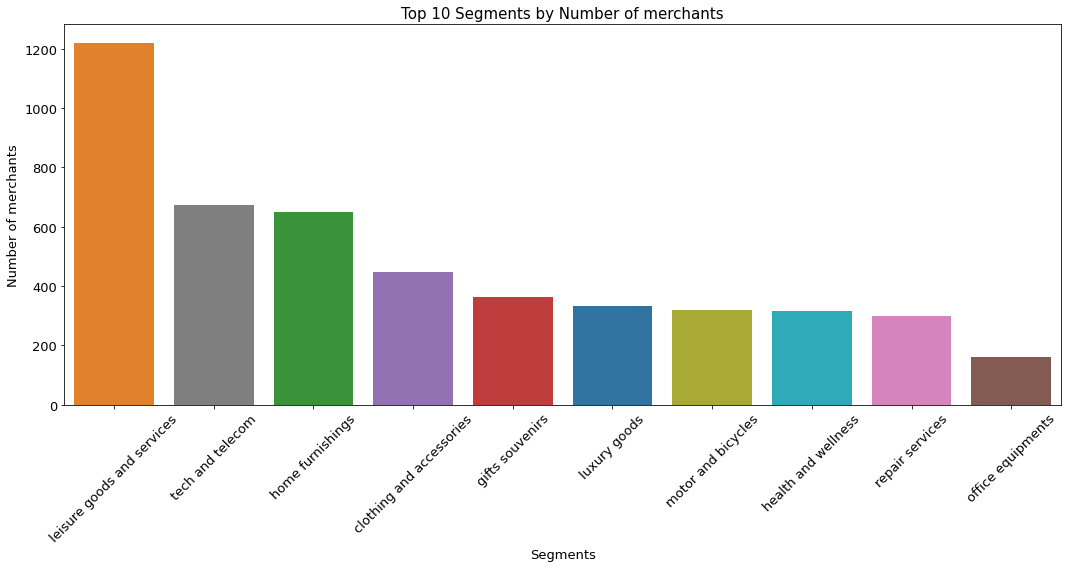

In [112]:
plt.figure(figsize=(15,8))
order = segment_summary[:10].groupby('segment').mean().sort_values('no_merchants', ascending=False).index[:10]
sns.barplot(x='segment', y='no_merchants', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Segments', fontsize=13)
plt.ylabel('Number of merchants', fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 10 Segments by Number of merchants", fontsize=15)
plt.tight_layout()
plt.savefig("segments_merchants.png",dpi=300)

## Number of Order for each segment

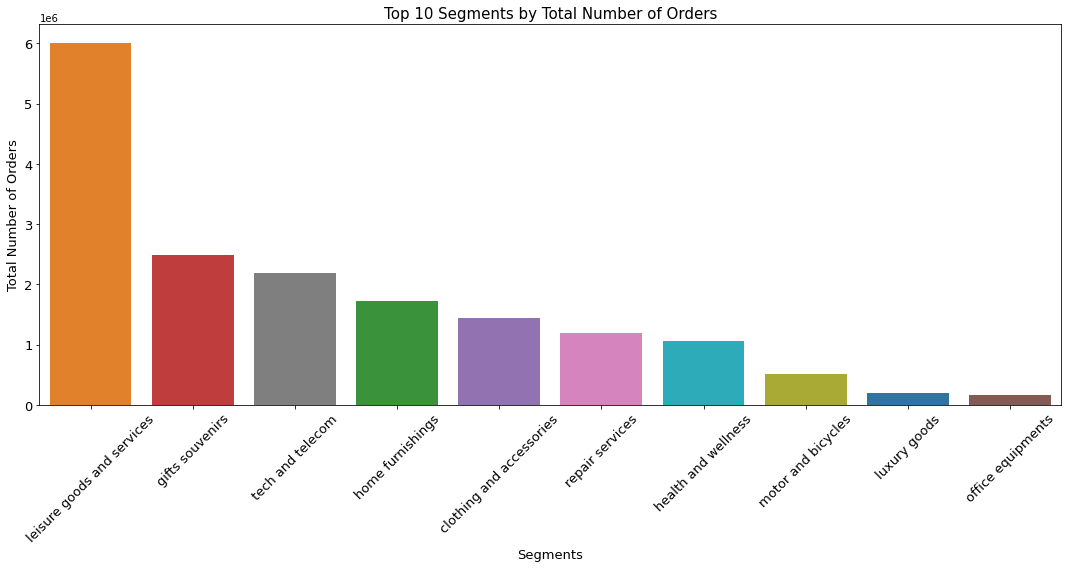

In [113]:
plt.figure(figsize=(15,8))
order = segment_summary[:10].groupby('segment').mean().sort_values('total_no_order', ascending=False).index[:10]
sns.barplot(x='segment', y='total_no_order', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Segments', fontsize=13)
plt.ylabel('Total Number of Orders', fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 10 Segments by Total Number of Orders", fontsize=15)
plt.tight_layout()
plt.savefig("segments_tot_orders.png",dpi=300)

Text(0.5, 1.0, 'Total daily orders under each Segment (valued between 1 and 2000)')

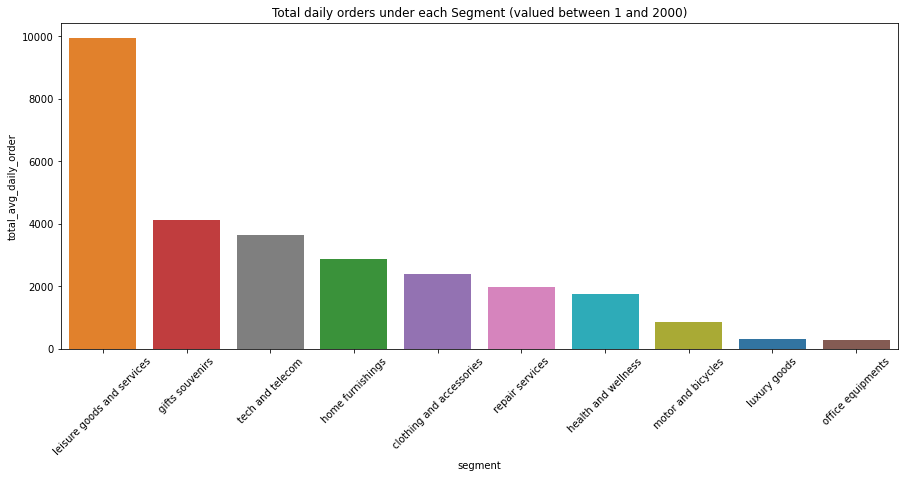

In [114]:
plt.figure(figsize=(15,6))
order = segment_summary[:10].groupby('segment').mean().sort_values('total_avg_daily_order', ascending=False).index[:10]
sns.barplot(x='segment', y='total_avg_daily_order', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45)
plt.title("Total daily orders under each Segment (valued between 1 and 2000)")

# plt.figure(figsize=(15,6))
# plot_order = tag_summary.groupby('industry_segment')['total_avg_daily_order'].mean().sort_values(ascending=False).index.values
# sns.barplot(x='industry_segment', y='total_avg_daily_order', data=tag_summary, order=plot_order, ci=False, estimator=np.mean, palette=palette)
# plt.xticks(rotation=45)
# plt.title("Total daily orders under each Segment (valued between 1 and 2000)")

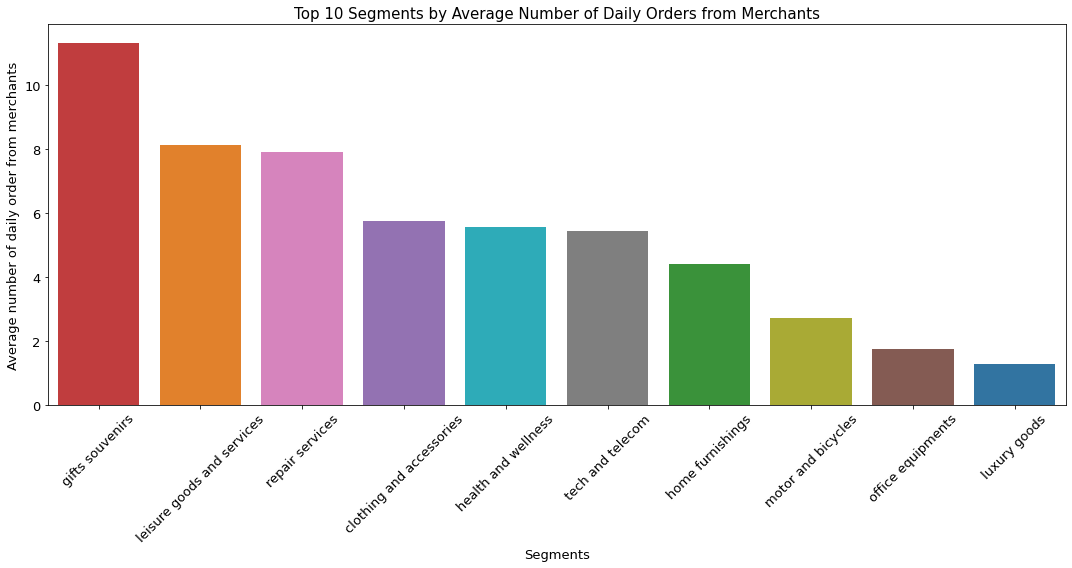

In [115]:
plt.figure(figsize=(15,8))
order = segment_summary[:10].groupby('segment').mean().sort_values('avg_daily_order', ascending=False).index[:10]
sns.barplot(x='segment', y='avg_daily_order', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Segments', fontsize=13)
plt.ylabel('Average number of daily order from merchants', fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 10 Segments by Average Number of Daily Orders from Merchants", fontsize=15)
plt.tight_layout()
plt.savefig("segments_avg_daily_order.png",dpi=300)

# plt.figure(figsize=(15,6))
# plot_order = tag_summary.groupby('industry_segment')['avg_daily_order'].mean().sort_values(ascending=False).index.values
# sns.barplot(x='industry_segment', y='avg_daily_order', data=tag_summary, order=plot_order, ci=False, estimator=np.mean, palette=palette)
# plt.xticks(rotation=45)


## Revenue under each segment

In [116]:
segment_summary['total_revenue'] = segment_summary['total_no_order'] * segment_summary['avg_value_per_order']

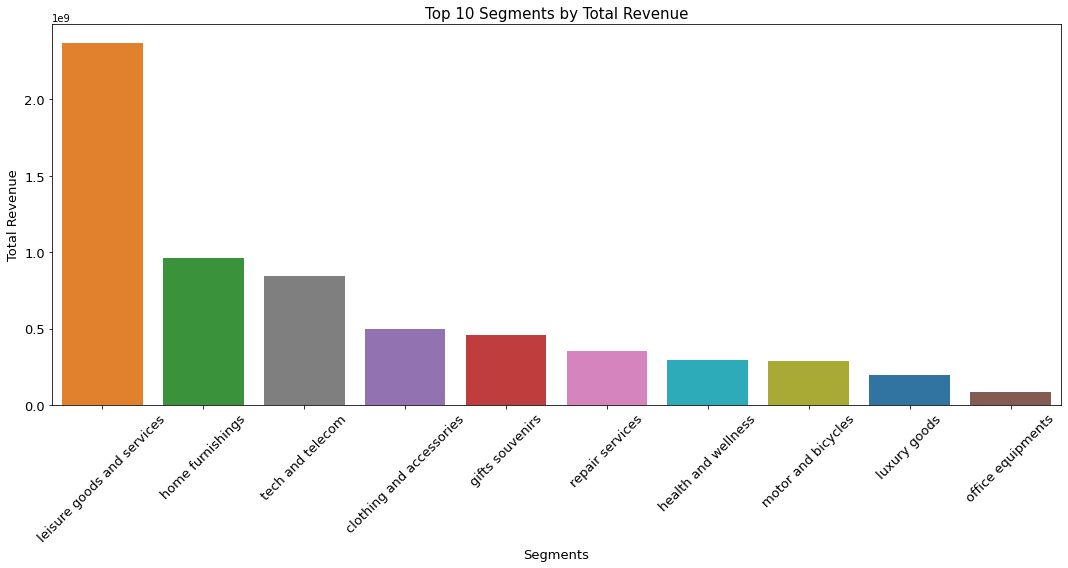

In [118]:
plt.figure(figsize=(15,8))
order = segment_summary[:10].groupby('segment').mean().sort_values('total_revenue', ascending=False).index[:10]
sns.barplot(x='segment', y='total_revenue', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Segments', fontsize=13)
plt.ylabel('Total Revenue', fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 10 Segments by Total Revenue", fontsize=15)
plt.tight_layout()
plt.savefig("segments_tot_revenue.png",dpi=300)

Text(0.5, 1.0, 'Total daily revenue under each Segment (for orders valued between 1 and 2000)')

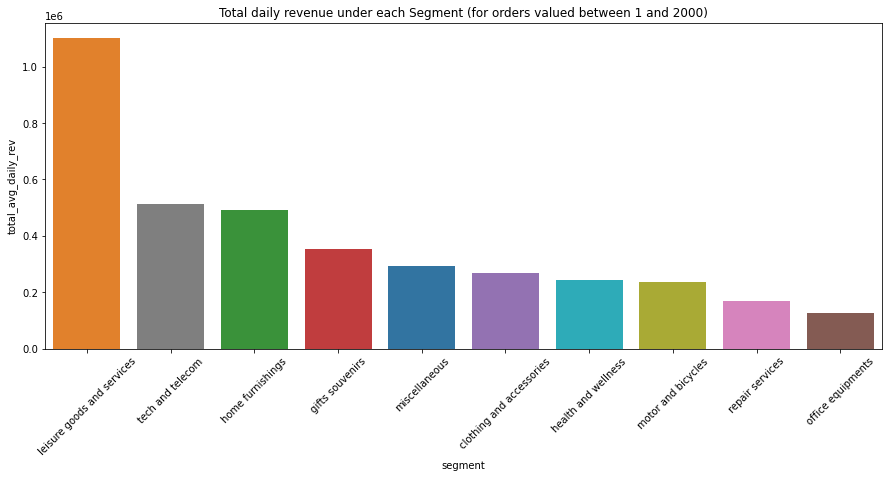

In [98]:
plt.figure(figsize=(15,6))
order = segment_summary.groupby('segment').mean().sort_values('total_avg_daily_rev', ascending=False).index[:10]
sns.barplot(x='segment', y='total_avg_daily_rev', data=segment_summary, order=order, ci=False, palette=palette)
plt.xticks(rotation=45)
plt.title("Total daily revenue under each Segment (for orders valued between 1 and 2000)")

# plt.figure(figsize=(15,6))
# plot_order = tag_summary.groupby('industry_segment')['total_avg_daily_rev'].mean().sort_values(ascending=False).index.values
# sns.barplot(x='industry_segment', y='total_avg_daily_rev', data=tag_summary, order=plot_order, ci=False, estimator=np.mean, palette=palette)
# plt.xticks(rotation=45)
# plt.title("Total daily revenue under each Segment (for orders valued between 1 and 2000)")

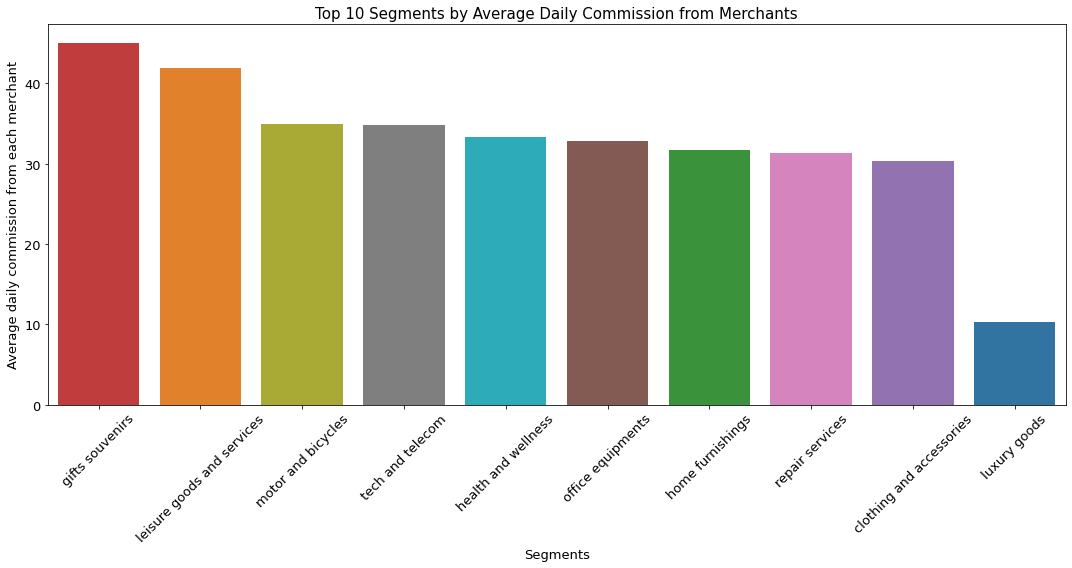

In [119]:
plt.figure(figsize=(15,8))
order = segment_summary[:10].groupby('segment').mean().sort_values('avg_daily_commission', ascending=False).index[:10]
sns.barplot(x='segment', y='avg_daily_commission', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Segments', fontsize=13)
plt.ylabel('Average daily commission from each merchant', fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 10 Segments by Average Daily Commission from Merchants", fontsize=15)
plt.tight_layout()
plt.savefig("segments_avg_daily_commission.png",dpi=300)


# plt.figure(figsize=(15,6))
# plot_order = tag_summary.groupby('industry_segment')['avg_daily_commission'].sum().sort_values(ascending=False).index.values
# sns.barplot(x='industry_segment', y='avg_daily_commission', data=tag_summary, order=plot_order, ci=False, estimator=sum, palette=palette)
# plt.xticks(rotation=45)
# plt.title("Total daily commission under each Segment (for orders valued between 1 and 2000)")

## Customer's demographic for each segment

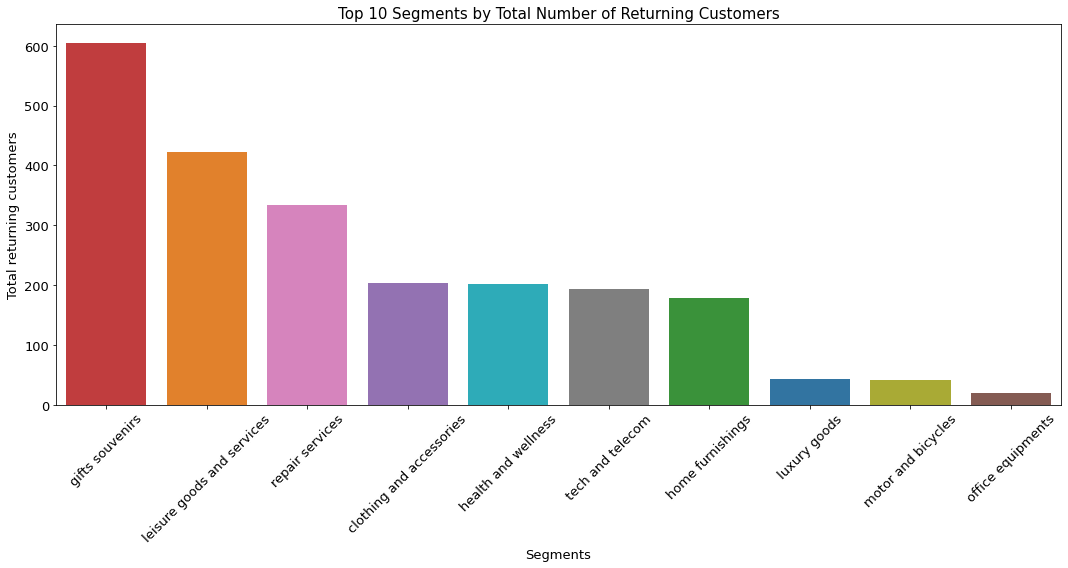

In [124]:
plt.figure(figsize=(15,8))
order = segment_summary[:10].groupby('segment').mean().sort_values('total_returning_customer', ascending=False).index
sns.barplot(x='segment', y='total_returning_customer', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Segments', fontsize=13)
plt.ylabel('Total returning customers', fontsize=13)
plt.yticks(fontsize=13)
plt.title("Top 10 Segments by Total Number of Returning Customers", fontsize=15)
plt.tight_layout()
plt.savefig("segments_tot_return_cust.png",dpi=300)

# plt.figure(figsize=(15,6))
# plot_order = tag_summary.groupby('industry_segment')['total_returning_customer'].sum().sort_values(ascending=False).index.values
# sns.barplot(x='industry_segment', y='total_returning_customer', data=tag_summary, order=plot_order, ci=False, estimator=sum, palette=palette)
# plt.xticks(rotation=45)
# plt.title("Total daily commission under each Segment (for orders valued between 1 and 2000)")

Text(0.5, 1.0, 'Average customer spending under each Segment (for orders valued between 1 and 2000)')

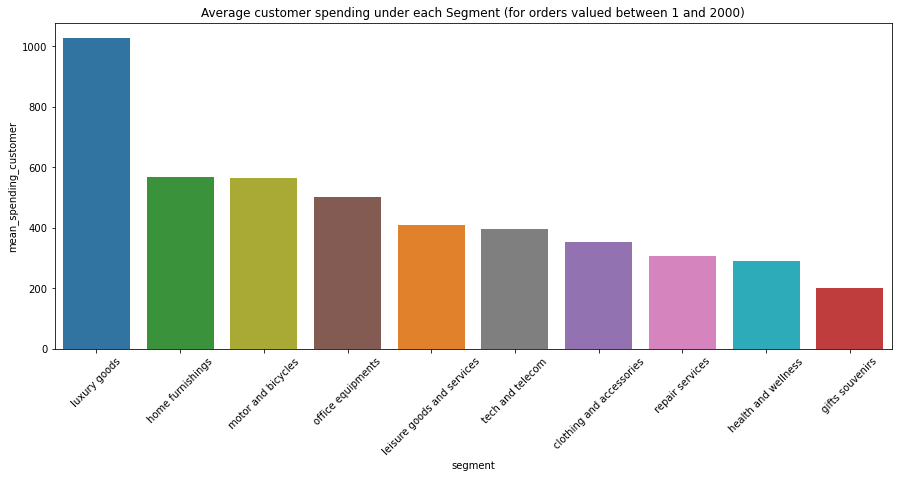

In [121]:
plt.figure(figsize=(15,6))
order = segment_summary[:10].groupby('segment').mean().sort_values('mean_spending_customer', ascending=False).index
sns.barplot(x='segment', y='mean_spending_customer', data=segment_summary[:10], order=order, ci=False, palette=palette)
plt.xticks(rotation=45)
plt.title("Average customer spending under each Segment (for orders valued between 1 and 2000)")

<div class="alert alert-block alert-warning">
<b>Note</b> Using total as comparisons may not be fair since 'leisure goods and services' has the most number of tags/merchants under the segment.
</div>

# Suggested Segments

### Recession-vulnerable 
- ### Gift & Souvenirs
    - Post-pandemic projected annual growth rate of **6.7%** ([link](https://www.marketwatch.com/press-release/personalized-gifts-market-is-estimated-to-accelerate-industry-growth-in-consumer-goods-sector-with-top-key-players-till-2028-no-of-pages-107-2022-09-28))
    - High average daily number of orders (greater exposure for the firm's growth)
    - High average daily commission
    - High number of returning customer (greater customer conversion rate)
    
- ### Leisure Goods & Services
    - Post-pandemic projected annual growth rate of **16%** ([link](https://simplywall.st/markets/us/consumer-discretionary/leisure))
    - Highest number of merchants
    - High average daily number of orders (greater exposure for the firm's growth)
    - High average daily commission
    - High number of returning customer (greater customer conversion rate)
    
- ### Home Furnishings
    - Post-pandemic projected annual growth rate of **22.52%** ([link](https://www.statista.com/outlook/dmo/ecommerce/furniture/australia))
    - High number of merchants
    - High total daily order from the segment
    - High total daily revenue from the segment
    
### Recession-proof
- ### Technology & Telecommunication
    - High post-pandemic projected annual growth rate of **27%** for IT industry overall and **11%** for telecommunication industry. ([link](https://simplywall.st/markets/au/tech))
    - High number of merchants
    - High total number of orders
    - High average daily revenue
    
- ### Repair Services
    - Post-pandemic projected annual growth rate of **7.9%** ([link](https://www.fortunebusinessinsights.com/inspection-repair-and-maintenance-market-102983))
    - High average daily number of orders
    - High number of returning customers
    - Moderate average daily commission

# Save merchant abn by segments to Json file

In [ ]:
final_segment_abn = {key: values for key, values in abn_in_segment.items() if key in ['leisure goods and services', 'home furnishings', 'gifts souvenirs','repair services', 'tech and telecom']}

In [ ]:
import json

with open('output.json', 'w+') as f:
    json.dump(final_segment_abn, f)
